# Illustrations for PCA algorithm

In [34]:
import json

import numpy as np
import pandas as pd

from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d

from sklearn.decomposition import PCA
import seaborn as sns

In [35]:
with open('config.json', 'r') as config_file:
    config = json.load(config_file)

In [36]:
BASE_COLOR = config['base_color']
LIGHT_COLOR = config['light_color']
DPI = config['dpi']
EDGE_COLOR = config['edge_color']

In [37]:
palette = f"blend:{BASE_COLOR},{LIGHT_COLOR}"

In [38]:
np.random.seed(42)

In [39]:
sns.set(font_scale=2)
sns.set_style("whitegrid")
sns.set_context("talk")

## Data preparation

In [40]:
# Параметры для генерации данных
n_samples = 500  # Количество точек
n_features = 3    # Количество измерений (3D)
centers = [[0, 0, 0]]  # Центр эллипсоида
cluster_std = 0.5  # Стандартное отклонение для шума

In [41]:
X1, _ = make_blobs(n_samples=int(n_samples * 1.5), n_features=n_features, centers=centers, cluster_std=cluster_std, random_state=42)
df1 = pd.DataFrame(X1, columns=['X', 'Y', 'Z'])

In [42]:
# Добавление шума
noise1 = np.random.normal(0, 0.1, df1.shape)
df1 += noise1

In [43]:
# Масштабирование данных для создания вытянутого эллипсоида
df1['X'] *= 1  # Оставляем X без изменений
df1['Y'] *= 3.5  # Увеличиваем Y в 3 раза
df1['Z'] *= 0.4  # Уменьшаем Z в 2 раза

In [44]:
# Генерация данных для второго эллипсоида с тем же центром
X2, _ = make_blobs(n_samples=int(n_samples * 0.75), n_features=n_features, centers=centers, cluster_std=cluster_std, random_state=42)
df2 = pd.DataFrame(X2, columns=['X', 'Y', 'Z'])

In [45]:
noise2 = np.random.normal(0, 0.1, df2.shape)
df2 += noise2

In [46]:
# Масштабирование данных для создания вытянутого эллипсоида
df2['X'] *= 2.5  # Увеличиваем X в 3 раза
df2['Y'] *= 1  # Оставляем Y без изменений
df2['Z'] *= 0.5  # Уменьшаем Z в 2 раза

In [47]:
# Матрица поворота на 45 градусов относительно осей X и Y
theta = np.radians(45)
rotation_matrix = np.array([
    [np.cos(theta), -np.sin(theta), 0],
    [np.sin(theta), np.cos(theta), 0],
    [np.sin(theta), np.cos(theta), 1]
])

In [48]:
rotated_data1 = df1.values @ rotation_matrix.T
rotated_data2 = df2.values @ rotation_matrix.T

In [49]:
df1_rotated = pd.DataFrame(rotated_data1, columns=['X', 'Y', 'Z'])
df2_rotated = pd.DataFrame(rotated_data2, columns=['X', 'Y', 'Z'])

In [50]:
n_outliers = 100

In [51]:
outliers_1 = np.random.uniform(low=-4, high=3.6, size=(n_outliers))
outliers_2 = np.random.uniform(low=-4, high=3.6, size=(n_outliers))
outliers_3 = np.random.uniform(low=-4, high=3.6, size=(n_outliers))

In [52]:
df = pd.concat([df1_rotated, df2_rotated,
               pd.DataFrame({'X': outliers_1, 'Y': outliers_2, 'Z': outliers_3})])

## Plots

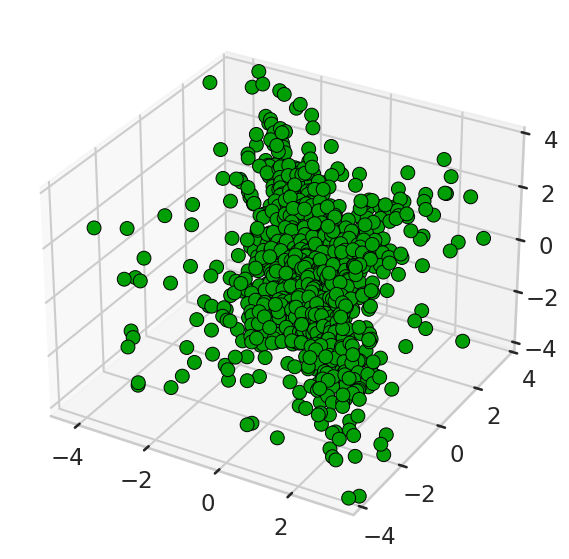

In [53]:
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['X'], df['Y'], df['Z'], c=BASE_COLOR, s=100, marker='o', edgecolors=EDGE_COLOR, alpha=1., linewidths=0.7)

# Установка одинакового масштаба для всех осей
max_range = np.array([df['X'].max() - df['X'].min(), df['Y'].max() - df['Y'].min(), df['Z'].max() - df['Z'].min()]).max() / 2.0
mid_x = (df['X'].max() + df['X'].min()) * 0.5
mid_y = (df['Y'].max() + df['Y'].min()) * 0.5
mid_z = (df['Z'].max() + df['Z'].min()) * 0.5

ax.set_xlim(mid_x - max_range, mid_x + max_range)
ax.set_ylim(mid_y - max_range, mid_y + max_range)
ax.set_zlim(mid_z - max_range, mid_z + max_range)

plt.savefig("images/pca_3d_data.png", transparent=True, dpi=DPI)

In [54]:
pca = PCA(n_components=2)

In [55]:
df_tr = pca.fit_transform(df)

In [56]:
components = pca.components_

In [57]:
mean = pca.mean_

In [58]:
class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        super().__init__((0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def do_3d_projection(self, renderer=None):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, self.axes.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
        return min(zs)

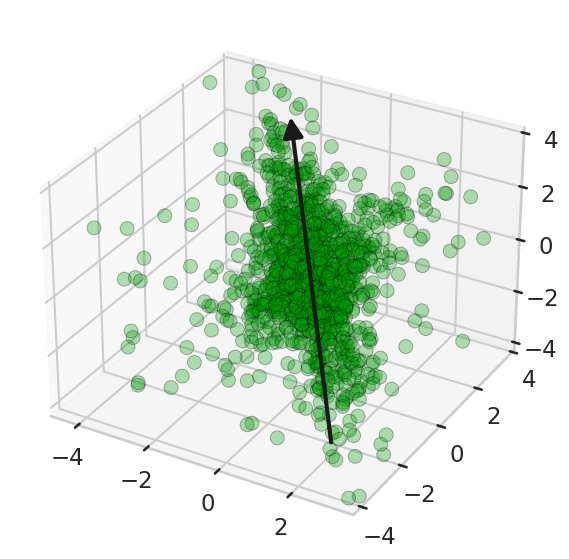

In [59]:
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['X'], df['Y'], df['Z'], c=BASE_COLOR, s=100, marker='o', 
           edgecolors=EDGE_COLOR, alpha=.3, linewidths=0.7)

comp = components[0]
color = 'black'
scaled_comp = comp * max_range * 1.2
start = mean - scaled_comp
end = mean + scaled_comp

arrow = Arrow3D(
    [start[0], end[0]], 
    [start[1], end[1]], 
    [start[2], end[2]], 
    mutation_scale=30, 
    lw=3,  
    arrowstyle="-|>", 
    color='k',
    alpha=1.
)
ax.add_artist(arrow)

max_range = np.array([df['X'].max() - df['X'].min(), 
                      df['Y'].max() - df['Y'].min(), 
                      df['Z'].max() - df['Z'].min()]).max() / 2.0
mid_x = (df['X'].max() + df['X'].min()) * 0.5
mid_y = (df['Y'].max() + df['Y'].min()) * 0.5
mid_z = (df['Z'].max() + df['Z'].min()) * 0.5
ax.set_xlim(mid_x - max_range, mid_x + max_range)
ax.set_ylim(mid_y - max_range, mid_y + max_range)
ax.set_zlim(mid_z - max_range, mid_z + max_range)

plt.savefig("images/pca_one_arrow.png", transparent=True, dpi=DPI)

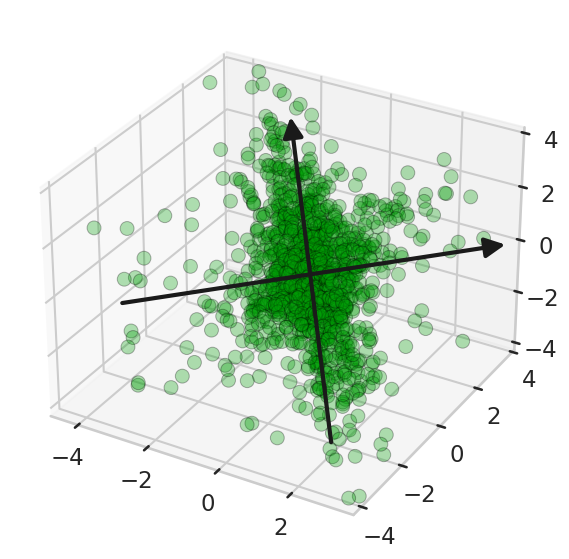

In [60]:
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['X'], df['Y'], df['Z'], c=BASE_COLOR, s=100, marker='o', 
           edgecolors=EDGE_COLOR, alpha=0.3, linewidths=0.7)

for i, (comp, color) in enumerate(zip(components, ['k', 'k'])):
    scaled_comp = comp * max_range * 1.2
    start = mean - scaled_comp
    end = mean + scaled_comp
    
    arrow = Arrow3D([start[0], end[0]], 
                   [start[1], end[1]], 
                   [start[2], end[2]], 
                   mutation_scale=30, 
                   lw=3, 
                   arrowstyle="-|>", 
                   color=color,
                   linestyle='-')
    ax.add_artist(arrow)

# Установка одинакового масштаба для всех осей
max_range = np.array([df['X'].max() - df['X'].min(), 
                      df['Y'].max() - df['Y'].min(), 
                      df['Z'].max() - df['Z'].min()]).max() / 2.0
mid_x = (df['X'].max() + df['X'].min()) * 0.5
mid_y = (df['Y'].max() + df['Y'].min()) * 0.5
mid_z = (df['Z'].max() + df['Z'].min()) * 0.5
ax.set_xlim(mid_x - max_range, mid_x + max_range)
ax.set_ylim(mid_y - max_range, mid_y + max_range)
ax.set_zlim(mid_z - max_range, mid_z + max_range)

plt.savefig("images/pca_two_arrows.png", transparent=True, dpi=DPI)

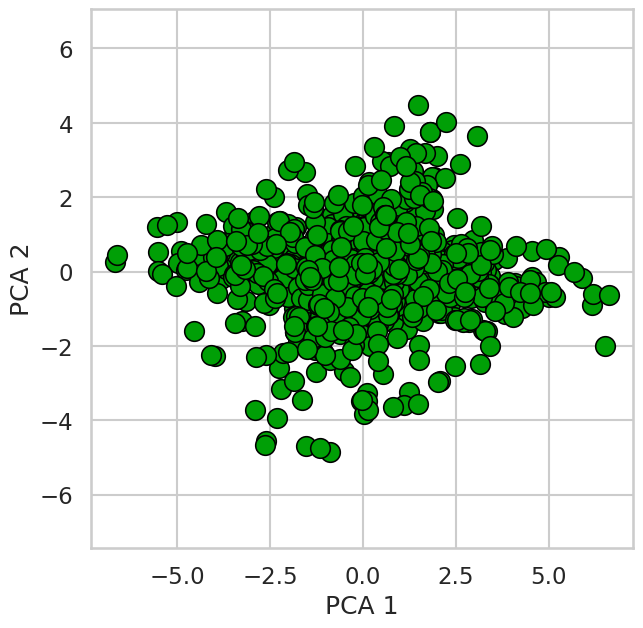

In [61]:
plt.figure(figsize=(7, 7))
ax = sns.scatterplot(pd.DataFrame(df_tr, columns=['PCA 1', 'PCA 2']), 
                     x='PCA 1', y='PCA 2', color=BASE_COLOR, s=200, edgecolor=EDGE_COLOR)
plt.axis('equal')
plt.savefig("images/pca_2d_data.png", transparent=True, dpi=DPI)

In [62]:
from pyod.models.pca import PCA

In [63]:
clf = PCA(n_components=2)
clf.fit(df)
y_train_scores = clf.decision_scores_

In [64]:
y_train_scores

array([13.98226713, 12.68921006,  8.24416832, ..., 11.89538976,
       12.32294645, 17.09919643])

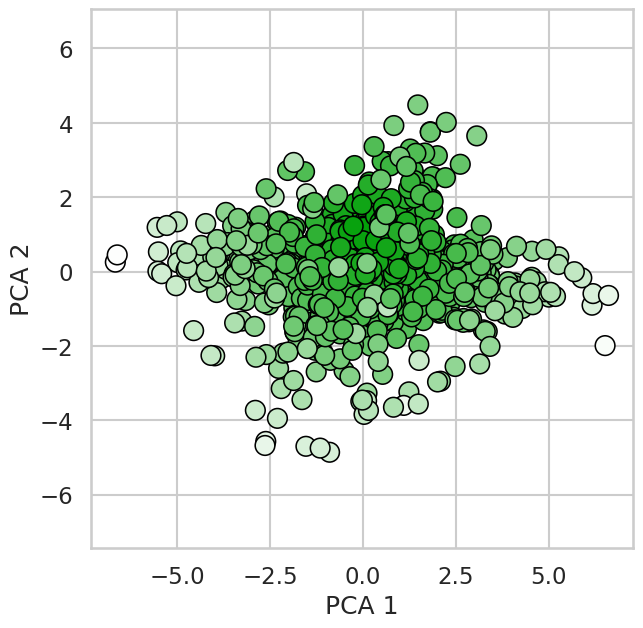

In [65]:
plt.figure(figsize=(7, 7))
ax = sns.scatterplot(pd.DataFrame(df_tr, columns=['PCA 1', 'PCA 2']), 
                     x='PCA 1', y='PCA 2', s=200, 
                     hue=y_train_scores, palette=sns.color_palette(palette, as_cmap=True), 
                     legend=False, edgecolor=EDGE_COLOR)
plt.axis('equal')
plt.savefig("images/pca_2d_data_scores.png", transparent=True, dpi=DPI)

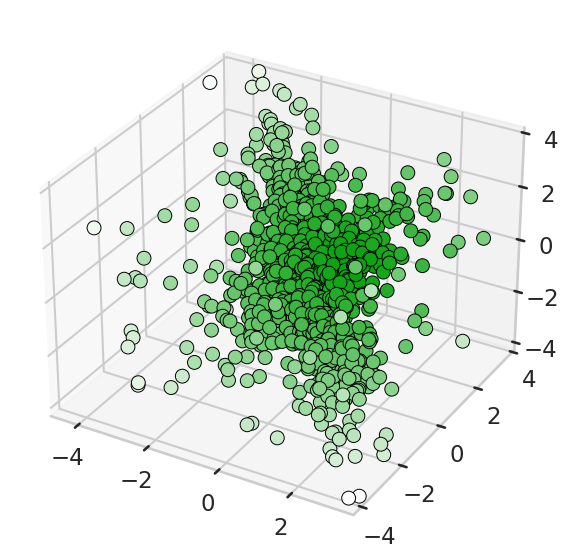

In [66]:
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['X'], df['Y'], df['Z'], s=100, marker='o', edgecolors=EDGE_COLOR, 
           c=y_train_scores, cmap=sns.color_palette(palette, as_cmap=True), 
           alpha=1., linewidths=0.7)

max_range = np.array([df['X'].max() - df['X'].min(), df['Y'].max() - df['Y'].min(), df['Z'].max() - df['Z'].min()]).max() / 2.0
mid_x = (df['X'].max() + df['X'].min()) * 0.5
mid_y = (df['Y'].max() + df['Y'].min()) * 0.5
mid_z = (df['Z'].max() + df['Z'].min()) * 0.5
ax.set_xlim(mid_x - max_range, mid_x + max_range)
ax.set_ylim(mid_y - max_range, mid_y + max_range)
ax.set_zlim(mid_z - max_range, mid_z + max_range)

plt.savefig("images/pca_3d_data_scores.png", transparent=True, dpi=DPI)